In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats

import os
import subprocess
import sys
import shutil

import codecs

In [2]:
from libraryIR import *
path_to_pool = "C:\\Users\\DavideDP\\AnacondaProjects\\Project\\terrier-core-4.2\\share\\TIPSTER\\pool\\qrels.trec7.txt"     

### We calculate weights

In [75]:
path = "C:\\Users\\alvis\\Desktop\\Reperimento_dell_Informazione\\Project\\temp"     
dir_comb = "comb" 
dir_w = "weights"  
www = findWeights(path, dir_comb, dir_w,exist=False)

In [76]:
print www

{'comb_min.txt': 0.0671863866897, 'comb_anz.txt': 0.0764415443893, 'condorcet.txt': 0.077282925698, 'comb_median.txt': 0.0748769445362, 'comb_max.txt': 0.0727252889073, 'comb_mnz.txt': 0.0781664613426, 'condorcetLog.txt': 0.0769667141821, 'condorcetWeighted.txt': 0.0774852018167, 'comb_sum.txt': 0.0781900029676, 'condorcetML.txt': 0.075823811474}


### We compare all Comb algorithms

In [77]:
combList="comb_anz.txt","comb_max.txt",'comb_median.txt','comb_min.txt','comb_mnz.txt','comb_sum.txt'
keys=www.keys()
x=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]#[]+keys
print combList
y={}
for cl in combList:
    y[cl]=list()

#for i in range(1,len(keys)+1):
for cl in combList:
    y[cl].append(www[cl])

('comb_anz.txt', 'comb_max.txt', 'comb_median.txt', 'comb_min.txt', 'comb_mnz.txt', 'comb_sum.txt')


[1 2 3 4 5 6]
[0.0764415443893]
[0.0727252889073]
[0.0748769445362]
[0.0671863866897]
[0.0781664613426]
[0.0781900029676]


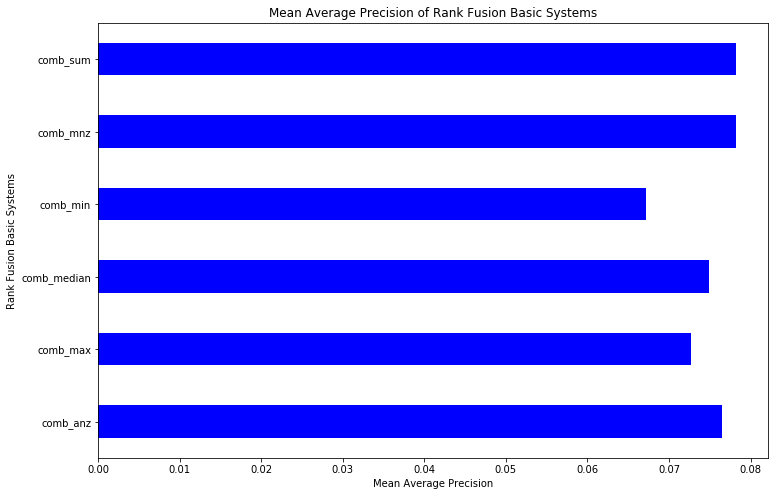

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams["figure.figsize"]=[12,8]
colors=["r","g", "b", "c", "k", "y"]

width = 0.45
ind = np.arange(1,len(combList)+1)
print ind
plt.xlabel('Mean Average Precision')
plt.ylabel('Rank Fusion Basic Systems')
plt.title('Mean Average Precision of Rank Fusion Basic Systems')
#y = y.values
pp = []
for i in range(len(combList)):
    print y[combList[i]]
    pp.append(y[combList[i]][0])
    #plt.plot(x,y[combList[i]][0],colors[i]+"--")
plt.barh(ind, pp, width, color='b', align='center')
plt.yticks(ind, [s.replace(".txt","") for s in combList])
#plt.legend( [s.replace(".txt","") for s in combList])
plt.show()

### We compare all Condorcet algorithms

In [92]:
combList="condorcet.txt","condorcetLog.txt",'condorcetWeighted.txt','condorcetML.txt'
keys=www.keys()
x=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]#[]+keys
print combList
y={}
for cl in combList:
    y[cl]=list()

#for i in range(1,len(keys)+1):
for cl in combList:
    y[cl].append(www[cl])

('condorcet.txt', 'condorcetLog.txt', 'condorcetWeighted.txt', 'condorcetML.txt')


[1 2 3 4]
[0.077282925698]
[0.0769667141821]
[0.0774852018167]
[0.075823811474]


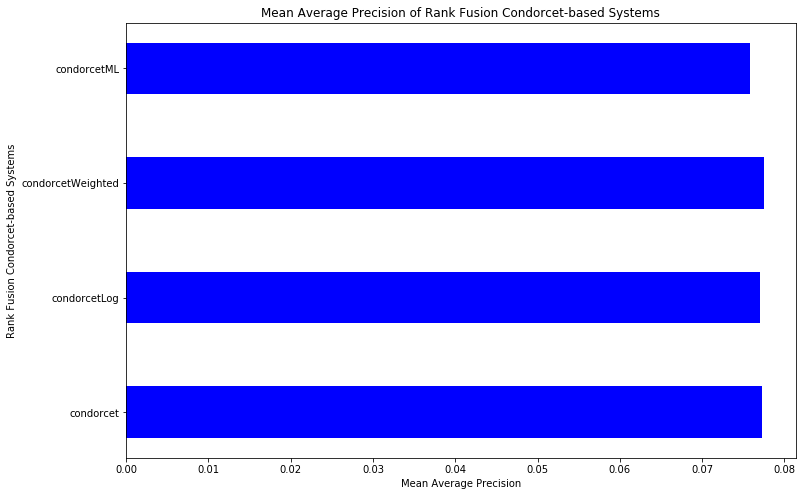

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams["figure.figsize"]=[12,8]
colors=["r","g", "b", "c", "k", "y"]

width = 0.45
ind = np.arange(1,len(combList)+1)
print ind
plt.xlabel('Mean Average Precision')
plt.ylabel('Rank Fusion Condorcet-based Systems')
plt.title('Mean Average Precision of Rank Fusion Condorcet-based Systems')
#y = y.values
pp = []
for i in range(len(combList)):
    print y[combList[i]]
    pp.append(y[combList[i]][0])
    #plt.plot(x,y[combList[i]][0],colors[i]+"--")
plt.barh(ind, pp, width, color='b', align='center')
plt.yticks(ind, [s.replace(".txt","") for s in combList])
#plt.legend( [s.replace(".txt","") for s in combList])
plt.show()

### We compare some Comb and Condorcet algorithms

In [90]:
combList="condorcet.txt",'condorcetWeighted.txt', 'comb_mnz.txt', 'comb_median.txt'
keys=www.keys()
x=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]#[]+keys
print combList
y={}
for cl in combList:
    y[cl]=list()

#for i in range(1,len(keys)+1):
for cl in combList:
    y[cl].append(www[cl])

('condorcet.txt', 'condorcetWeighted.txt', 'comb_mnz.txt', 'comb_median.txt')


[1 2 3 4]
[0.077282925698]
[0.0774852018167]
[0.0781664613426]
[0.0748769445362]


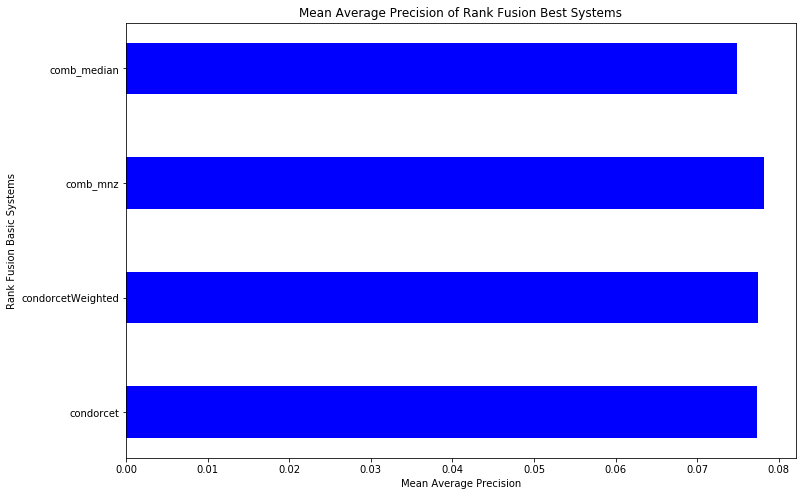

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams["figure.figsize"]=[12,8]
colors=["r","g", "b", "c", "k", "y"]

width = 0.45
ind = np.arange(1,len(combList)+1)
print ind
plt.xlabel('Mean Average Precision')
plt.ylabel('Rank Fusion Basic Systems')
plt.title('Mean Average Precision of Rank Fusion Best Systems')
#y = y.values
pp = []
for i in range(len(combList)):
    print y[combList[i]]
    pp.append(y[combList[i]][0])
    #plt.plot(x,y[combList[i]][0],colors[i]+"--")
plt.barh(ind, pp, width, color='b', align='center')
plt.yticks(ind, [s.replace(".txt","") for s in combList])
#plt.legend( [s.replace(".txt","") for s in combList])
plt.show()

### We compare all algorithms

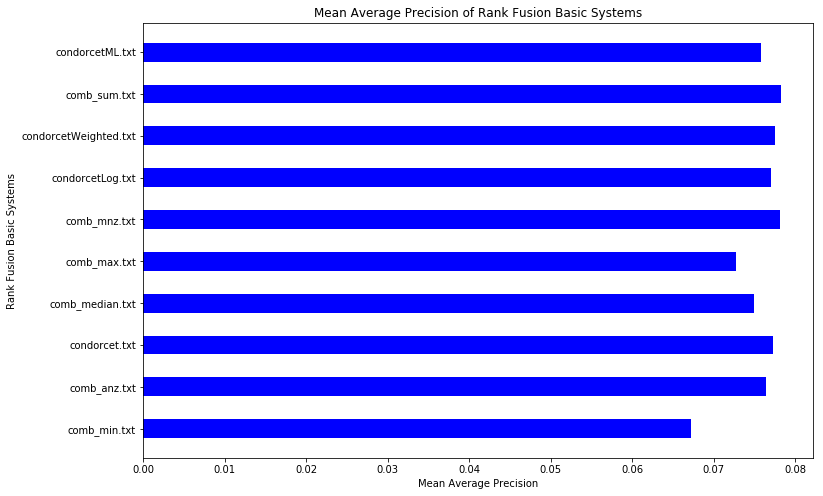

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams["figure.figsize"]=[12,8]

#plt.xlabel(' Number of randomly chosen input systems')
#plt.ylabel('Mean Average Precision')
#plt.title('TREC 5: combining random sets of systems')
#plt.plot(x,y1,'r--',x,y2,'g--',x,y3,'b--',x,y4,'y--')
#plt.legend(["Condorcet","Condorcet Pesato","Comb MNZ","Comb Median"])
#plt.show()

#ind = np.arange(1,len(reg_coef)+1)  # the x locations for the groups
width = 0.45       # the width of the bars
ind = np.arange(1,len(www.values())+1)
plt.barh(ind, www.values(), width, color='b', align='center')
plt.xlabel('Mean Average Precision')
#plt.xticks(ind, www.keys())
plt.yticks(ind, www.keys())
plt.ylabel('Rank Fusion Basic Systems')
plt.title('Mean Average Precision of Rank Fusion Basic Systems')
plt.show()